In [11]:
import numpy as np
import matplotlib.pyplot as plt

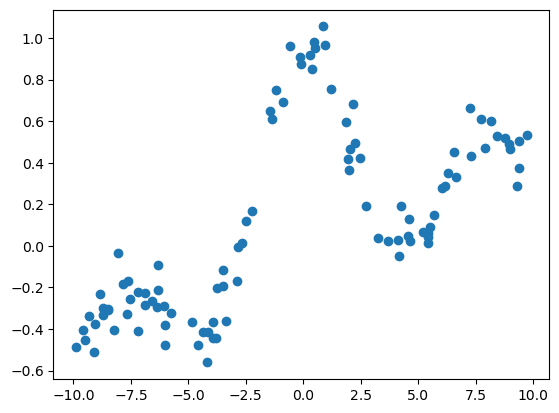

In [12]:
data = np.loadtxt('data.csv', delimiter=',')
# sort by first column
data = data[data[:, 0].argsort()]

x = data[:, 0]
y = data[:, 1]

plt.scatter(x, y)

In [13]:
# list from -10 to 10 inclusive with 50 points equally spaced
mus = np.linspace(-10, 10, 50)
sigma = 1

gaussians = []
for mu in mus:
    gaussians.append(np.exp(-0.5 * (x - mu)**2 / sigma**2))

In [14]:
from sklearn.linear_model import LinearRegression
np.random.seed(0)
model = LinearRegression()
model.fit(np.array(gaussians).T, y)

LinearRegression()

In [15]:
model.coef_[0]

1390780.9232622476

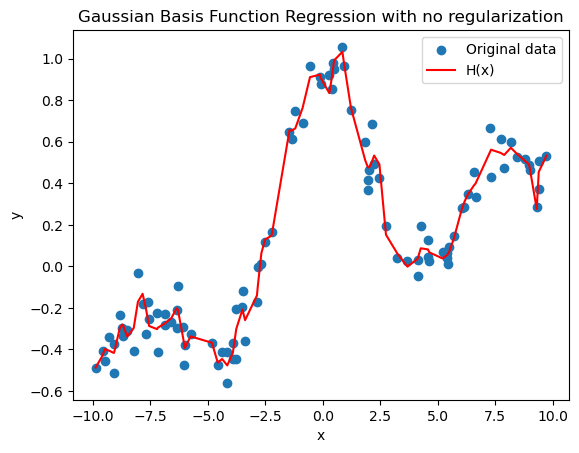

In [16]:
# Calculate H(x) using the trained model
hx = model.predict(np.array(gaussians).T)

# Plot the original data
plt.scatter(x, y)

# Plot H(x) on top of the original data
plt.plot(x, hx, color='red')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Gaussian Basis Function Regression with no regularization')
plt.legend(['Original data', 'H(x)'])
plt.show()

In [17]:
from sklearn.linear_model import Ridge
np.random.seed(0)
model = Ridge(alpha=0.1)
model.fit(np.array(gaussians).T, y)

Ridge(alpha=0.1)

In [18]:
hx_ridge = model.predict(np.array(gaussians).T)

# Plot the original data
plt.scatter(x, y)

# Plot H(x) using Ridge on top of the original data
plt.plot(x, hx_ridge, color='red')

# Show the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gaussian Basis Function Regression with Ridge regularization')
plt.legend(['Original data', 'H(x) with Ridge'])
plt.show()